# Análise do Sentimento e do víes do Relatório Short da Empiricus em TradersClub (B3:TRAD3) por meios estatísticos

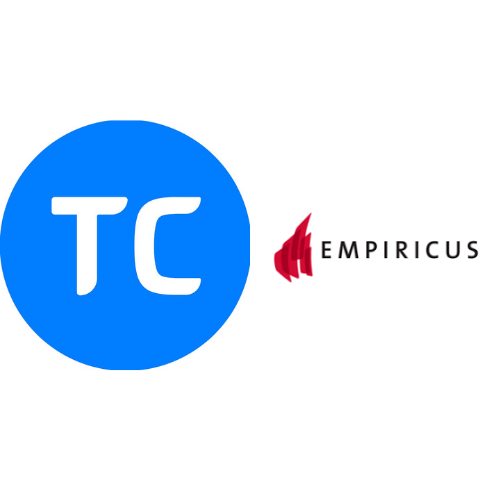

In [140]:
Image.open(r'C:\Users\sique\Downloads\EmpTC.png')

# O relatório aparecerá de forma censurada para que não haja a divulgação de conteúdo exclusivo para assinantes

### Caso tenha interesse em acessar o relatório, assine a carteira "Palavra do Estrategista" produzida pelo Felipe Miranda, Sócio e analista da casa. Hoje o relatório conta com 390 mil assinantes e é um dos carros chefes da Empiricus

<a href='https://www.empiricus.com.br/assinaturas/palavra-do-estrategista-anual/'>Veja o Relatório Aqui</a>

In [ ]:
import nltk

In [3]:
from nltk.tokenize import word_tokenize

<div class='alert alert-block alert-danger'>
    Relatório Censurado
</div>    

# O relatório da Empiricus foi carregado dentro da variável article

### Tratamento dos dados

>Primeiro tokenizaremos o Artigo
>>Segundamente, Retiraremos os caractéres alfanuméricos (como vírgulas, pontos etc)
>>>E por final, vamos eliminar as chamadas 'Stop Words' (Em sua grande parte conjunções, artigos, preposições e alguns advérbios) 

### Tudo isso para que tenhamos uma base limpa para iniciar a análise

In [102]:
from collections import Counter
tokens = word_tokenize(article)


lower_tokens = [t for t in word_tokenize(article.lower()) if t.isalpha()]


In [13]:
from nltk.corpus import floresta

In [18]:
stopwords = nltk.corpus.stopwords.words('portuguese')

In [41]:
tokens_without_sw = [word for word in lower_tokens if not word in stopwords]

In [52]:
tokens=list(dict.fromkeys(tokens_without_sw))

In [53]:
res = {}
for key in tokens:
    for value in add:
        res[key] = value
        add.remove(value)
        break 

### Aqui definimos o modo de exibição de um Word Cloud com os termos mais utilizados

In [67]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(20, 15))
    plt.imshow(wordcloud) 
    plt.axis("off");

In [50]:
add=[]
for x in list(dict.fromkeys(tokens_without_sw)):
    add.append(tokens_without_sw.count(x))

In [88]:
mask = np.array(Image.open(r'C:\Users\sique\Downloads\TC.png'))

In [69]:
import numpy as np

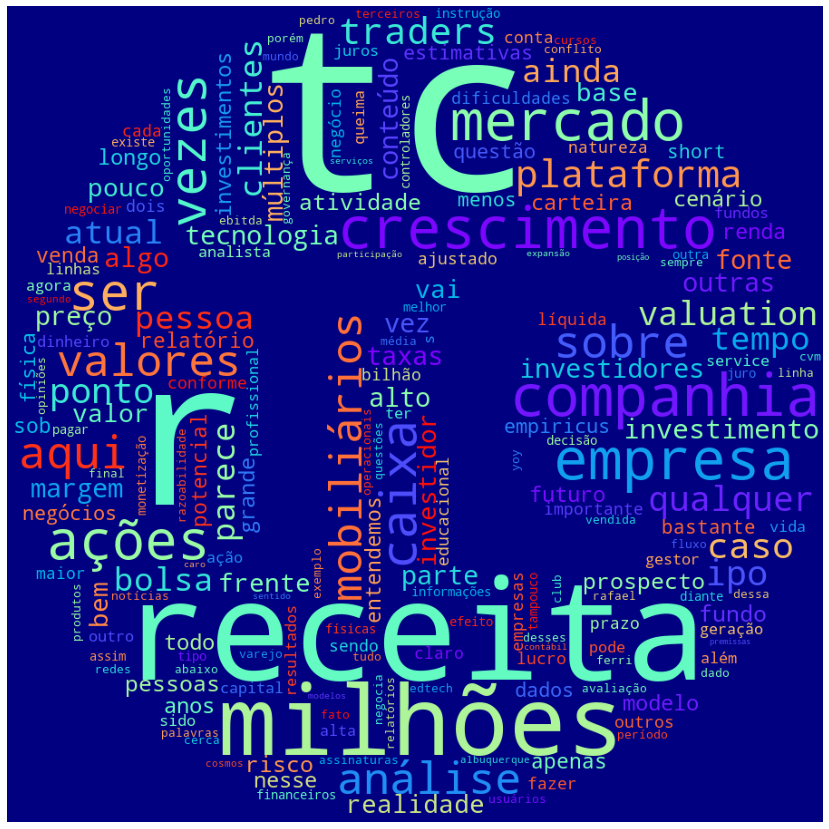

In [93]:
# Generate wordcloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='navy', colormap='rainbow', collocations=False, mask=mask).generate_from_frequencies(res)
# Plot
plot_cloud(wordcloud)

# No Word Cloud Observamos forte presença dos termos Receita, Valuation, Caixa e Crescimento.

## Os quatro termos se relacionam em uma sucinta tese: O Mercado precificou e está precificando um nível de Receita para 2024 que os Analistas da Empiricus veêm como inatingível de acordo com as atuais perspectivas de mercado, como por exemplo o aumento da taxa de juros que proporciona um custo de oportunidade maior na hora de fazer investimentos e aquisições buscando crescimento (Growth Investment)

## Com esse valor de receita em cheque o Valuation de Hoje estaria muito acima do preço justo, ainda levando em conta o fato de os analistas da casa não classificarem a empresa como um case de Tecnologia, afim de questionar os múltiplos que ela negocia hoje (P/L 222).   

## Além disso outro argumento que invalida a projeção de receita para 2024 é o fato de provavelmente o TC não conseguir manter as mesmas taxas de crescimento do passado, período em que houve o 'Estouro' da plataforma, diretamente relacionado ao primeiro parágrafo.

## No entanto, não é levado em conta as questões regulatórias como o BTC do ativo, que hoje encontra-se já na casa dos 28%, refletindo a alta demanda por aluguéis dos papéis da empresa. Outras coisas à serem levadas em conta é a elevada volatilidade histórica do papel, que hoje está em 101% e o volume médio, que está em cerca de 3,3 Milhões desde o IPO. Faltando o alerta ao investidor sobre um possível short squeeze, que levaria a uma grande alta pelo efeito em cadeia.

## Outros fatores a serem questionados são suposições e inferências em relação à índole e veracidade de dados de desempenho do fundo de um dos controladores, que possui cota aberta na CVM, tirando o sentido dessas suposições.

In [147]:
import yfinance

In [169]:
def vol_hist(Ativo):
    x=yfinance.Ticker(f'{Ativo}'+'.SA')
    df=x.history(period='max')
    df['variação percentual']=df['Close'].pct_change()
    y=df['variação percentual'].std()*np.sqrt(252)
    volume=df['Volume'].mean()
    print(f'A volatilidade histórica de TRAD3 hoje é {round(y*100)}% e possui média de volume de {round(volume)}')

In [170]:
vol_hist('TRAD3')

A volatilidade histórica de TRAD3 hoje é 101% e possui média de volume de 3256907


# Análise de Sentimento do Relatório Feita através de um modelo de NLP (Neural Language Processing) que utiliza do modelo de classificação estatística Naive Bayes para analisar padrões

### Algoritmo treinado em um modelo de Machine Learning para reconhecer a Polaridade e Imparcialidade das falas através de padrões

### Primeiro o algoritmo analisa-se a polaridade e a subjetividade do texto.

In [101]:
from textblob import TextBlob
frase = TextBlob(article)
frase.sentiment

Sentiment(polarity=-0.16164799253034542, subjectivity=0.6215919701213819)

### O algoritmo reconhece o tom negativo do texto e um elevado nível de subjetividade nas sentenças 

In [110]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from pylab import rcParams
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [111]:
%matplotlib inline
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 20,10
rcParams['font.size'] = 30
sns.set()
np.random.seed(8)

In [130]:
def graf_dist(inp,cor):
    plt.figure()
    ax = sns.distplot(inp)
    plt.axvline(np.mean(inp), color=cor, linestyle="dashed", linewidth=5)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(inp.mean()),
    )
    return plt.figure

# Analisando o sentimento de cerca de 16 relatórios Short de duas casas reconhecidíssimas do Sell Side, BTG e JP Morgan, em pesquisa previamente feita, observamos que a média de subjetividade das análises feitas pelos dois bancos (0.30 e 0.22 respectivamente) estão bem abaixo da apresentada no artigo da Empiricus, levantando dúvidas em relação aos interesses na sugestão da posição

In [119]:
JPsentiment= np.load("Jpsentiment.npy")

In [122]:
BTGsentiment= np.load("BTGsentiment.npy")

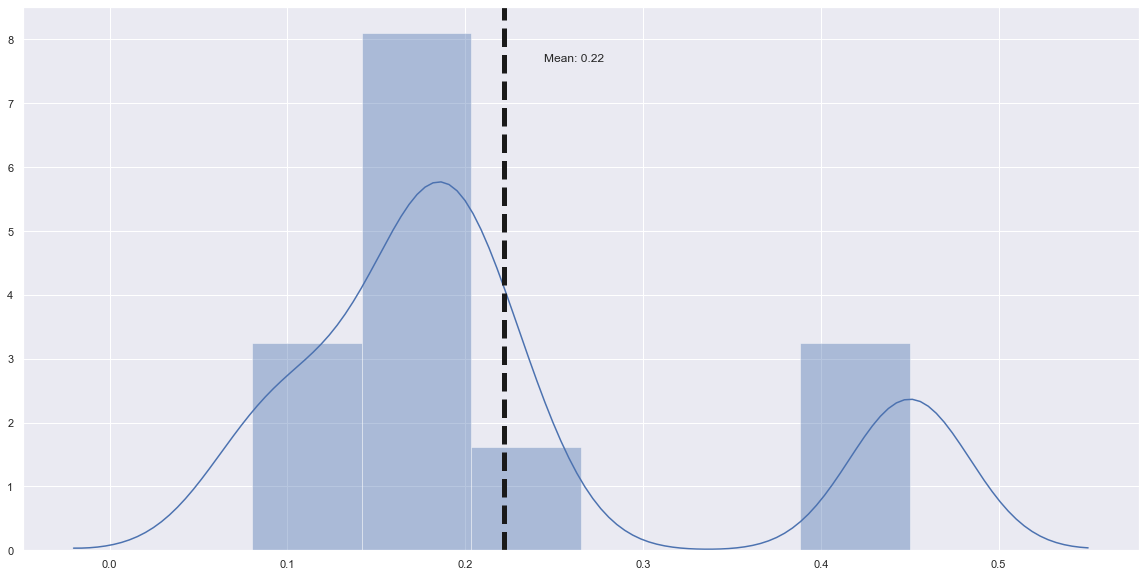

In [131]:
graf_dist(JPsentiment,'k');

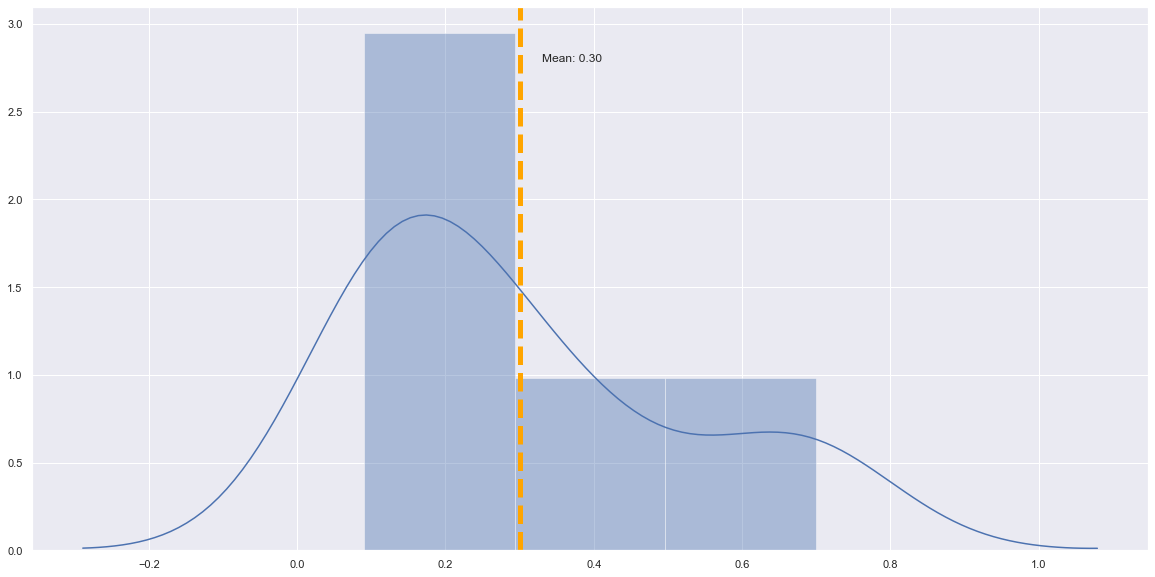

In [132]:
graf_dist(BTGsentiment,'orange');

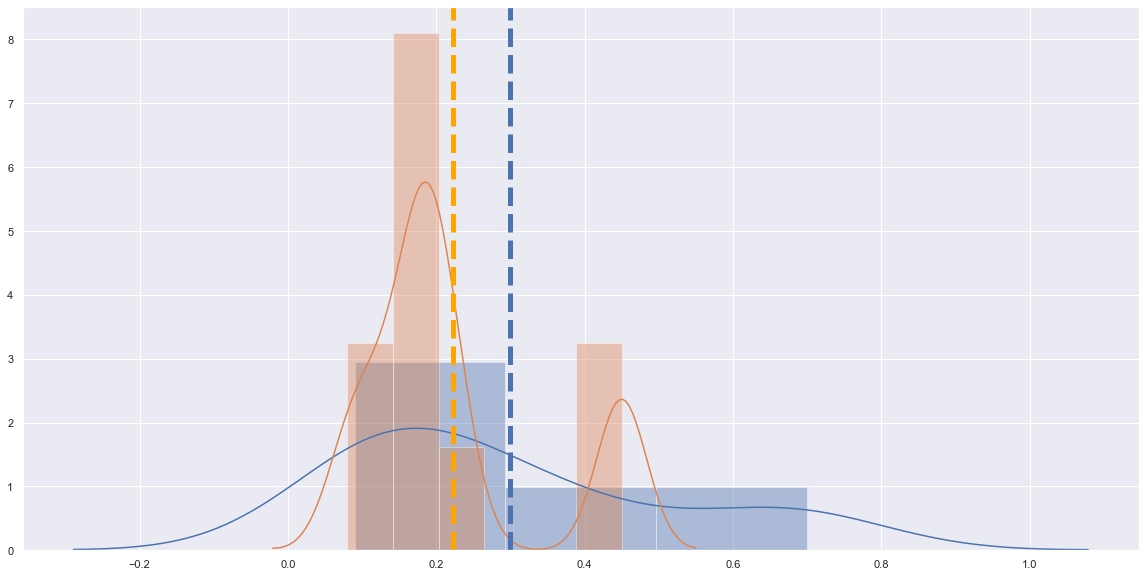

In [124]:
plt.figure()
ax1 = sns.distplot(BTGsentiment)
ax2 = sns.distplot(JPsentiment)
plt.axvline(np.mean(BTGsentiment), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(JPsentiment), color='orange', linestyle='dashed', linewidth=5);

# DISCLAIMER

## Os conteúdos aqui apresentados não são recomendações de investimento, apenas representam minha opinião pessoal e alguns dados estatísticos que à comprovam.